# Kaggle - House Prices - Advanced Regression Techniques

## Data Cleaning - Simple +
1. lenient delete for the worst columns
1. keep ordinal features as numeric
1. fillna of numerical features with mean and 0 as fit
1. transform month with sin; log skewed cols
1. add poly features


#### import needed libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

In [35]:
suffix = "12"

#### read train and test sets

In [36]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

#### store both dfs lengths

In [37]:
m_train = df_train.shape[0]
m_test = df_test.shape[0]
m_train, m_test

(1460, 1459)

#### concat the dfs

In [38]:
df = pd.concat([df_train, df_test])
assert df.shape[0] == m_train + m_test

#### see df head

In [39]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


# save target and drop unwanted columns

In [40]:
target_col = "SalePrice"
target = df[target_col]

In [41]:
cols_to_drop = ["Id", "Street", "Utilities", "LowQualFinSF", "3SsnPorch", "PoolArea", target_col]
df.drop(cols_to_drop, axis=1, inplace=True)

# Inspect and fix categorical columns

In [42]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [43]:
num_cols = df.select_dtypes(np.number).columns
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [44]:
num_to_object = ['MSSubClass']
df[num_to_object] = df[num_to_object].astype(object)

In [45]:
num_cols = df.select_dtypes(np.number).columns
num_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [46]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

# Inspect and fix missing values in categorical features

In [47]:
df[cat_cols].isnull().sum()[df[cat_cols].isnull().sum() > 0]

MSZoning           4
Alley           2721
Exterior1st        1
Exterior2nd        1
MasVnrType        24
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
Electrical         1
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageFinish     159
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64

### Inspect individual columns if needed

In [48]:
# df["MasVnrType"].value_counts()

In [49]:
na_fill_cols = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1",
                "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", 
                "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [50]:
for col in cat_cols:
    if col in na_fill_cols:
        df[col] = df[col].fillna("None")
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

In [51]:
df[cat_cols].isnull().sum()[df[cat_cols].isnull().sum() > 0]

Series([], dtype: int64)

# Inspect and fix missing values in numerical features

In [52]:
df[num_cols].isnull().sum()[df[num_cols].isnull().sum() > 0]

LotFrontage     486
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     159
GarageCars        1
GarageArea        1
dtype: int64

In [53]:
df.loc[df["BsmtFullBath"].isna(), "BsmtFullBath"]

660   NaN
728   NaN
Name: BsmtFullBath, dtype: float64

In [54]:
zero_fill_cols = ["LotFrontage", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "TotalBsmtSF"]
for col in num_cols:
    if col in zero_fill_cols:
        df[col] = df[col].fillna(0)
    else:
        df[col] = df[col].fillna(df[col].mean())
df[num_cols].isnull().sum()[df[num_cols].isnull().sum() > 0]

Series([], dtype: int64)

# transform columns

#### month sold to cyclic with period 12

In [55]:
df["MoSold"] = df["MoSold"].astype(np.float32)
df["MoSold"] = df["MoSold"] * 2 * np.pi / 12

#### log skewed features

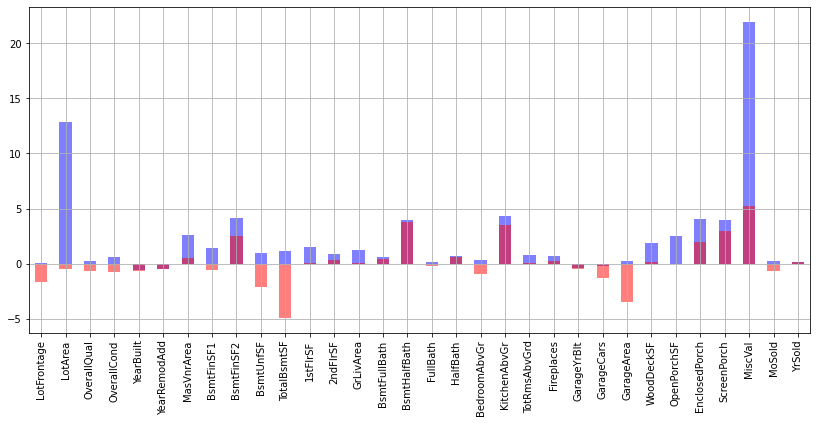

In [56]:
df[num_cols].skew(axis=0).plot(kind='bar', color='blue', alpha=0.5, figsize=(14, 6)) 
np.log1p(df[num_cols]).skew(axis=0).plot(kind='bar', color='red', alpha=0.5) 
plt.grid()

In [57]:
cols_to_log = ["LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "1stFlrSF", "2ndFlrSF", 'GrLivArea', 'BsmtFullBath', 
                'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
                'ScreenPorch', 'MiscVal']
df[cols_to_log] = np.log1p(df[cols_to_log])

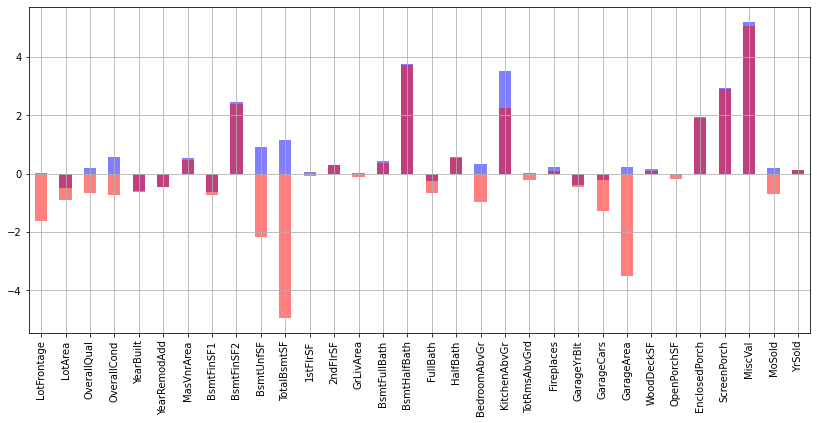

In [58]:
df[num_cols].skew(axis=0).plot(kind='bar', color='blue', alpha=0.5, figsize=(14, 6))
np.log1p(df[num_cols]).skew(axis=0).plot(kind='bar', color='red', alpha=0.5) 
plt.grid()

In [59]:
cols_to_relog = ["MasVnrArea", 'BsmtFinSF2', '1stFlrSF', 'BsmtFullBath', 'KitchenAbvGr', 'Fireplaces', 'WoodDeckSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal']
df[cols_to_relog] = np.log1p(df[cols_to_relog])

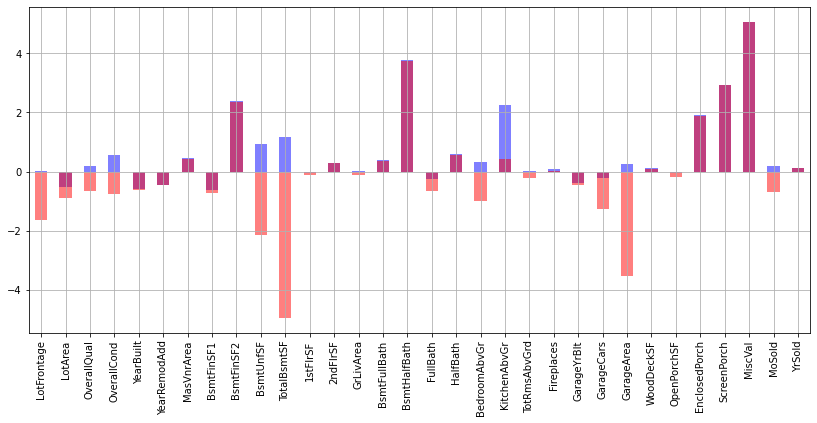

In [60]:
df[num_cols].skew(axis=0).plot(kind='bar', color='blue', alpha=0.5, figsize=(14, 6))
np.log1p(df[num_cols]).skew(axis=0).plot(kind='bar', color='red', alpha=0.5) 
plt.grid()

In [61]:
cols_to_re_relog = ['KitchenAbvGr']
df[cols_to_re_relog] = np.log1p(df[cols_to_re_relog])

# add poly features

In [62]:
poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features = poly.fit_transform(df[num_cols])
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(num_cols)).reset_index(drop=True)
df.drop(num_cols, axis=1, inplace=True)
df.reset_index(inplace=True, drop=True)
df = pd.concat([df, poly_df], axis=1)

# one hot encoding

In [63]:
df_dummies = pd.get_dummies(df)

# recombine with target and save

In [64]:
target.reset_index(inplace=True, drop=True)
df_dummies = pd.concat([df_dummies, target], axis=1)
df_dummies.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,MoSold,YrSold,LotFrontage^2,LotFrontage LotArea,LotFrontage OverallQual,LotFrontage OverallCond,LotFrontage YearBuilt,LotFrontage YearRemodAdd,LotFrontage MasVnrArea,LotFrontage BsmtFinSF1,LotFrontage BsmtFinSF2,LotFrontage BsmtUnfSF,LotFrontage TotalBsmtSF,LotFrontage 1stFlrSF,LotFrontage 2ndFlrSF,LotFrontage GrLivArea,LotFrontage BsmtFullBath,LotFrontage BsmtHalfBath,LotFrontage FullBath,LotFrontage HalfBath,LotFrontage BedroomAbvGr,LotFrontage KitchenAbvGr,LotFrontage TotRmsAbvGrd,LotFrontage Fireplaces,LotFrontage GarageYrBlt,LotFrontage GarageCars,LotFrontage GarageArea,LotFrontage WoodDeckSF,LotFrontage OpenPorchSF,LotFrontage EnclosedPorch,LotFrontage ScreenPorch,LotFrontage MiscVal,LotFrontage MoSold,LotFrontage YrSold,LotArea^2,LotArea OverallQual,LotArea OverallCond,LotArea YearBuilt,LotArea YearRemodAdd,LotArea MasVnrArea,LotArea BsmtFinSF1,LotArea BsmtFinSF2,LotArea BsmtUnfSF,LotArea TotalBsmtSF,LotArea 1stFlrSF,LotArea 2ndFlrSF,LotArea GrLivArea,LotArea BsmtFullBath,LotArea BsmtHalfBath,LotArea FullBath,LotArea HalfBath,LotArea BedroomAbvGr,LotArea KitchenAbvGr,LotArea TotRmsAbvGrd,LotArea Fireplaces,LotArea GarageYrBlt,LotArea GarageCars,LotArea GarageArea,LotArea WoodDeckSF,LotArea OpenPorchSF,LotArea EnclosedPorch,LotArea ScreenPorch,LotArea MiscVal,LotArea MoSold,LotArea YrSold,OverallQual^2,OverallQual OverallCond,OverallQual YearBuilt,OverallQual YearRemodAdd,OverallQual MasVnrArea,OverallQual BsmtFinSF1,OverallQual BsmtFinSF2,OverallQual BsmtUnfSF,OverallQual TotalBsmtSF,OverallQual 1stFlrSF,OverallQual 2ndFlrSF,OverallQual GrLivArea,OverallQual BsmtFullBath,OverallQual BsmtHalfBath,OverallQual FullBath,OverallQual HalfBath,OverallQual BedroomAbvGr,OverallQual KitchenAbvGr,OverallQual TotRmsAbvGrd,OverallQual Fireplaces,OverallQual GarageYrBlt,OverallQual GarageCars,OverallQual GarageArea,OverallQual WoodDeckSF,OverallQual OpenPorchSF,OverallQual EnclosedPorch,OverallQual ScreenPorch,OverallQual MiscVal,OverallQual MoSold,OverallQual YrSold,OverallCond^2,OverallCond YearBuilt,OverallCond YearRemodAdd,OverallCond MasVnrArea,OverallCond BsmtFinSF1,OverallCond BsmtFinSF2,OverallCond BsmtUnfSF,OverallCond TotalBsmtSF,OverallCond 1stFlrSF,OverallCond 2ndFlrSF,OverallCond GrLivArea,OverallCond BsmtFullBath,OverallCond BsmtHalfBath,OverallCond FullBath,OverallCond HalfBath,OverallCond BedroomAbvGr,OverallCond KitchenAbvGr,OverallCond TotRmsAbvGrd,OverallCond Fireplaces,OverallCond GarageYrBlt,OverallCond GarageCars,OverallCond GarageArea,OverallCond WoodDeckSF,OverallCond OpenPorchSF,OverallCond EnclosedPorch,OverallCond ScreenPorch,OverallCond MiscVal,OverallCond MoSold,OverallCond YrSold,YearBuilt^2,YearBuilt YearRemodAdd,YearBuilt MasVnrArea,YearBuilt BsmtFinSF1,YearBuilt BsmtFinSF2,YearBuilt BsmtUnfSF,YearBuilt TotalBsmtSF,YearBuilt 1stFlrSF,YearBuilt 2ndFlrSF,YearBuilt GrLivArea,YearBuilt BsmtFullBath,YearBuilt BsmtHalfBath,YearBuilt FullBath,YearBuilt HalfBath,YearBuilt BedroomAbvGr,YearBuilt KitchenAbvGr,YearBuilt TotRmsAbvGrd,YearBuilt Fireplaces,YearBuilt GarageYrBlt,YearBuilt GarageCars,YearBuilt GarageArea,YearBuilt WoodDeckSF,YearBuilt OpenPorchSF,YearBuilt EnclosedPorch,YearBuilt ScreenPorch,YearBuilt MiscVal,YearBuilt MoSold,YearBuilt YrSold,YearRemodAdd^2,YearRemodAdd MasVnrArea,YearRemodAdd BsmtFinSF1,YearRemodAdd BsmtFinSF2,YearRemodAdd BsmtUnfSF,YearRemodAdd TotalBsmtSF,YearRemodAdd 1stFlrSF,YearRemodAdd 2ndFlrSF,YearRemodAdd GrLivArea,YearRemodAdd BsmtFullBath,YearRemodAdd BsmtHalfBath,YearRemodAdd FullBath,YearRemodAdd HalfBath,YearRemodAdd BedroomAbvGr,YearRemodAdd KitchenAbvGr,YearRemodAdd TotRmsAbvGrd,YearRemodAdd Fireplaces,YearRemodAdd GarageYrBlt,Y

In [65]:
df_dummies.to_csv(f"data/preprocessed{suffix}.csv", index=False)
df_dummies.shape

(2919, 824)

# Score: 0.13071, 0.13944